# **_Gradiente Descendente_** 
##### Es un algoritmo de optimizacion utilizado en Machine Learning y estadistica para minimizar una funcion objetivo, comunmente una funcion de costo o perdida. EL objetivo principal es encontrar los valores optimos de los parametros del modelo que minimizan la funcion de costo.

### **_Conceptos basicos_**
##### __Funcion de costo:__ mide cuan mal esta funcionando tu modelo
##### __Gradiente:__ es un vector de derivadas parciales de la funcion de costo con respecto a su parametro. Indica la direccion y la magnitud del cambio necesario en los parametos para minimizar la funcion de costo.
##### __Tasa de aprendizaje:__ es un hiperparametro que setermina el tamaño de los pasos que da el algoritmo hacia el minimo de la funcion de costo.


#### **_Algoritmo de gradiente descendente_**
- Inicializa los parametros del modelo con valores aleatorios.
- Calcula el valor de la funcion de costo.
- Calcula el gradiente de la funcion de costo con respecto a los parametros.
- Actualiza los parametros en la direccion opuesta al gradiente.
- Repite los pasos 2-4 hasta que los cambios en la funcion de costo sean pequeños o hasta que se alcance un numero maximo de iteraciones. 


# **_Ejemplo practico_**

Iteration 0: Cost 38.8901010085235
Iteration 100: Cost 1.3101307429917295
Iteration 200: Cost 0.6705723719047965
Iteration 300: Cost 0.6161626227259244
Iteration 400: Cost 0.5830295478411678
Iteration 500: Cost 0.5591187559935217
Iteration 600: Cost 0.5417949652070698
Iteration 700: Cost 0.5292425174469526
Iteration 800: Cost 0.5201472664132134
Iteration 900: Cost 0.5135570303028821


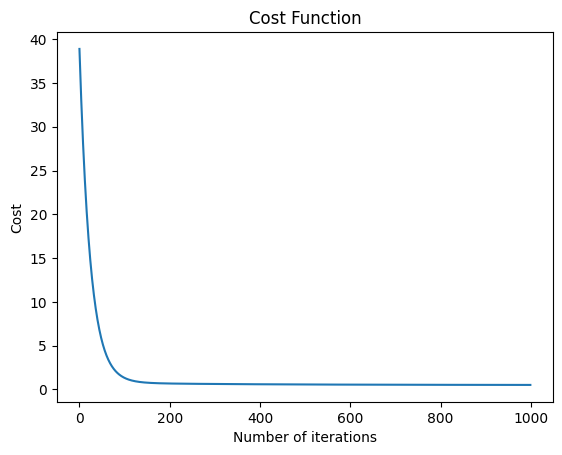

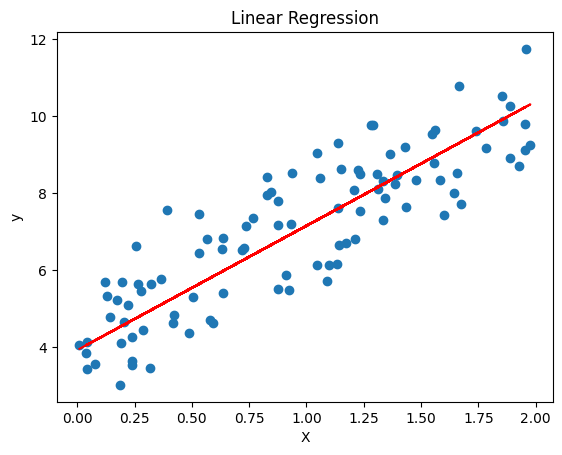

w: [[3.23112218]], b: [3.92614535]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0) #genera numeros aleatorios
X = 2 * np.random.rand(100, 1) #genera 100 puntos de datos aleatorios (100 filas y 1 columna) dentro del rango [0, 2]
y = 4 + 3 * X + np.random.randn(100, 1) #genera valores en (y)  utilizando una relación lineal y = 4 + 3 * X con ruido aleatorio agregado para simular datos reales. El ruido se agrega con np.random.randn(100, 1), que genera valores aleatorios con distribución normal (media 0 y desviación estándar 1).

# Inicializar parámetros
w = np.random.randn(1, 1)
b = np.random.randn(1) #Inicializa el sesgo b como un número aleatorio.
learning_rate = 0.01 #Define la tasa de aprendizaje, que controla cuánto se ajustan los parámetros en cada iteración del gradiente descendente.
num_iterations = 1000 #Define el número de iteraciones que el gradiente descendente realizará para ajustar los parámetros.

# Función de costo
def compute_cost(X, y, w, b):
    m = len(y)
    cost = (1/(2*m)) * np.sum((X.dot(w) + b - y)**2) #Calcula el costo utilizando el error cuadrático medio (MSE). La suma de los errores al cuadrado se divide por 2*m para promediar el costo.
    return cost

# Gradiente descendente
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        y_pred = X.dot(w) + b
        dw = (1/m) * X.T.dot(y_pred - y)
        db = (1/m) * np.sum(y_pred - y)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    
    return w, b, cost_history

# Ejecutar gradiente descendente
w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, num_iterations)

# Plotear el costo
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

# Plotear la regresión lineal
plt.scatter(X, y)
plt.plot(X, X.dot(w) + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

print(f"w: {w}, b: {b}")
